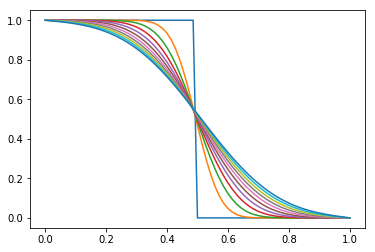

In [16]:
#####•••••EXPLICIT
import numpy as np
import matplotlib.pyplot as plt

nx = 71 ###***number of spatial points***###
nt = 1001 ###***number of time points***###
Tfinal = 0.02 ###***Final time***###

x = np.linspace(0,1,nx)
dx = (1-0)/(nx-1) ##
t = np.linspace(0,Tfinal,nt)
dt = (Tfinal-0)/(nt-1)
u = 1
C = u*(dt/dx) ## stability depends on this if tfinal smaller,if nt bigger,if nx smaller
mu = 1
##**Creating the structure**## each row contains a timestep.
X = np.ones( [nt,nx] )



phiIC = 1*(x<0.5)+0  ###***Initial conditions***###€

for j in range(0,nx):
    X[0,j] = phiIC[j]

    
for i in range(0,nt-1): # 0 to 10
    for j in range(1,nx-1): # 1 to 9
        X[i+1,j] = X[i,j] - C*(X[i,j+1] - X[i,j-1])/2 + mu*(C/(dx))*(X[i,j-1]-2*X[i,j]+X[i,j+1])
    X[i+1,nx-1] = X[i,nx-1] ###***implementation of a boundary condition***###
    X[i+1,0] = X[i,0]       
    ### More possible BC. e.g. neuman/periodic conditions
    #   X[i+1,nx-1] = X[i,0] 
    
    
##Extraction of time steps
for i in range(0,nt,100):
    y = X[i,:]
    plt.plot(x,y)


In [175]:
for x in range(0,11):
    print(x)
print(np.linspace(0,1,11))

T = np.array([[1, 2], [3, 4]])

print(T)
print(T[0,1])
print(T[0,:])
print(T[:,0])
print(T@T[0,:])
print(T@T[:,0])
np.zeros([2,2])

0
1
2
3
4
5
6
7
8
9
10
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[[1 2]
 [3 4]]
2
[1 2]
[1 3]
[ 5 11]
[ 7 15]


array([[0., 0.],
       [0., 0.]])

Y equals [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Y equals afer BC [[1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
39.0 0.0
c = [39.  0.  0.  0.  0.]
W equals [[1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
fully implicit [[572. -33.   0.   0.   0.]
 [-39. 572. -33.   0.   0.]
 [  0. -39. 572. -33.   0.]
 [  0.   0. -39. 572. -33.]
 [  0.   0.   0. -39. 572.]]
[[1.00000000e+00 1.00000000e+00 0.00000000e+0

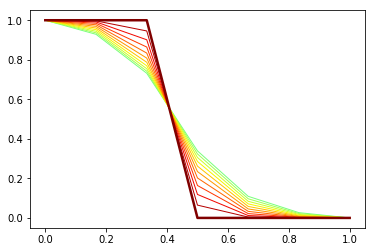

In [86]:
####•••••Fully implicit
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy.linalg import inv

nx = 7 ###***number of spatial points***###
nt = 11 ###***number of time points***###
Tfinal = 0.02 ###***Final time***###

x = np.linspace(0,1,nx)
dx = (1-0)/(nx-1) 
t = np.linspace(0,Tfinal,nt)
dt = (Tfinal-0)/(nt-1)
u = 1
mu = 1
PHI = 1

phiIC = phiIC = 1*(x<0.5)+0 ###***Initial conditions***###€
Y = np.zeros( [nt,nx] )
print("Y equals", Y)

for j in range(len(x)-1): ## range starts at 1 and goes to nx-2
    Y[0,j] = phiIC[j]
Y[:,0] = phiIC[0]          ### these hold at all time, Dirichlet
Y[:,nx-1] = phiIC[nx-1]

print("Y equals afer BC", Y)

a =  (u/(2*dx))*Y[0,0] + (mu/(dx**2))*Y[0,0]
b =  -1*(u/(2*dx))*Y[0,nx-1] + (mu/(dx**2))*Y[0,nx-1]
print(a,b)

c = np.zeros(nx-2)
c[0] = a
c[nx-3] =b
print("c =",c)

##construction of the inner(non boundary) points

W = np.delete(Y, [0,nx-1], axis=1)  # delete second column of C
print("W equals",W)

A = np.eye(nx-2,nx-2,k=-1)*(-(PHI*u/(2*dx))-(PHI*mu/(dx**2))) +np.eye(nx-2,nx-2)*((1/dt)+(2*PHI*mu/(dx**2))) + np.eye(nx-2,nx-2,k=1)*((PHI*u/(2*dx))-(PHI*mu/(dx**2)))
E = A
print("fully implicit",E)



for i in range(0,nt-1):
    W[i+1,:] = inv(E)@( (W[i,:]*(1/dt) + c) )

                       
print(W)

##Reconstruction of Y
for i in range(0,nt):
    for j in range(1,nx-1):
        Y[i,j] = W[i,j-1]
print("Y= " , Y)
    
cmap = plt.get_cmap('jet_r')
N = 20   
for i in range(0,nt,1):
    y = Y[i,:]
    color = cmap(float(i)/N)
    lw = 2.5 if i==0 else 1
    plt.plot(x, y, c=color, lw=lw, zorder=-i)

Y equals [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
Y equals afer BC [[1. 1. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0.]]
39.0 0.0
c = [39.  0.  0.  0.  0.]
W equals [[1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
matrix E,B [[626.   -57.75   0.     0.     0.  ]
 [-68.25 626.   -57.75   0.     0.  ]
 [  0.   -68.25 626.   -57.75   0.  ]
 [  0.     0.   -68.25 626.   -57.75]
 [  0.     0.     0.   -68.25 626.  ]]

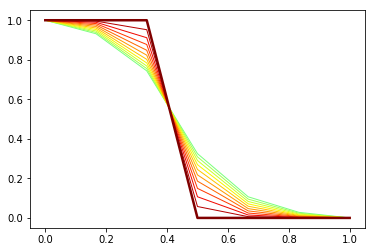

In [14]:
###Here is code for semi implicit method
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy.linalg import inv

nx = 7 ###***number of spatial points***###
nt = 11 ###***number of time points***###
Tfinal = 0.02 ###***Final time***###

x = np.linspace(0,1,nx)
dx = (1-0)/(nx-1) 
t = np.linspace(0,Tfinal,nt)
dt = (Tfinal-0)/(nt-1)
u = 1
mu = 1 ### increasing this increases stability
PHI = 0.75

phiIC = phiIC = 1*(x<0.5)+0 ###***Initial conditions***###€
Y = np.zeros( [nt,nx] )
print("Y equals", Y)

for j in range(len(x)-1): ## range starts at 1 and goes to nx-2
    Y[0,j] = phiIC[j]
Y[:,0] = phiIC[0]          ### these hold at all time, Dirichlet
Y[:,nx-1] = phiIC[nx-1]

print("Y equals afer BC", Y)

a =  PHI*(u/(2*dx))*Y[0,0] + PHI*(mu/(dx**2))*Y[0,0] + (1-PHI)*(u/(2*dx))*Y[1,0] + (1-PHI)*(mu/(dx**2))*Y[1,0]
b =  -1*PHI*(u/(2*dx))*Y[0,nx-1] + PHI*(mu/(dx**2))*Y[0,nx-1] -1*(1-PHI)*(u/(2*dx))*Y[1,nx-1] + (1-PHI)*(mu/(dx**2))*Y[1,nx-1]
print(a,b)

c = np.zeros(nx-2)
c[0] = a
c[nx-3] =b
print("c =",c)

##construction of the inner(non boundary) points

W = np.delete(Y, [0,nx-1], axis=1)  # delete second column of C
print("W equals",W)

A = np.eye(nx-2,nx-2,k=-1)*(-(PHI*u/(2*dx))-(PHI*mu/(dx**2))) +np.eye(nx-2,nx-2)*((1/dt)+(2*PHI*mu/(dx**2))) + np.eye(nx-2,nx-2,k=1)*((PHI*u/(2*dx))-(PHI*mu/(dx**2)))
E = A
B = np.eye(nx-2,nx-2,k=-1)*(((1-PHI)*u/(2*dx))+((1-PHI)*mu/(dx**2))) + np.eye(nx-2,nx-2)*((1/dt)-(2*(1-PHI)*mu/(dx**2))) + np.eye(nx-2,nx-2,k=1)*((-(1-PHI)*u/(2*dx))+((1-PHI)*mu/(dx**2)))
print("matrix E,B",E,B)



for i in range(0,nt-1):
    W[i+1,:] = inv(E)@( (B@W[i,:]) + c ) ## clearly the inverse should be stored rather than calculated loads of times
print(W)

##Reconstruction of Y
for i in range(0,nt):
    for j in range(1,nx-1):
        Y[i,j] = W[i,j-1]
print("Y= " , Y)
    
cmap = plt.get_cmap('jet_r')
N = 20   
for i in range(0,nt,1):
    y = Y[i,:]
    color = cmap(float(i)/N)
    lw = 2.5 if i==0 else 1
    plt.plot(x, y, c=color, lw=lw, zorder=-i)

[0.00196131+0.j 0.00186524+0.j 0.00174825+0.j 0.00157695+0.j
 0.00164508+0.j]


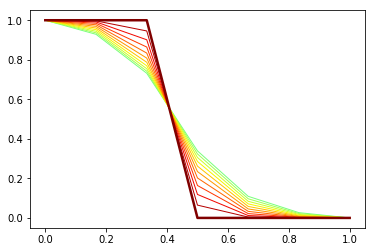

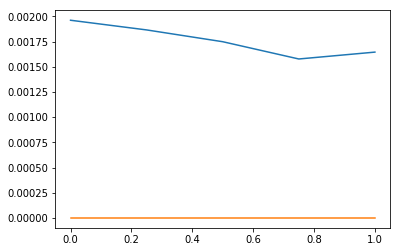

In [63]:
### Method above with different parameter values
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from numpy.linalg import inv

nx = 7 ###***number of spatial points***###
nt = 11 ###***number of time points***###
Tfinal = 0.02 ###***Final time***###

x = np.linspace(0,1,nx)
dx = (1-0)/(nx-1) 
t = np.linspace(0,Tfinal,nt)
dt = (Tfinal-0)/(nt-1)
u = 1
mu = 1 ### increasing this increases stability
PHI = 1 ### here we have overrelaxation that makes the 

phiIC = phiIC = 1*(x<0.5)+0 ###***Initial conditions***###€
Y = np.zeros( [nt,nx] )

for j in range(len(x)-1): ## range starts at 1 and goes to nx-2
    Y[0,j] = phiIC[j]
Y[:,0] = phiIC[0]          ### these hold at all time, Dirichlet
Y[:,nx-1] = phiIC[nx-1]

a =  PHI*(u/(2*dx))*Y[0,0] + PHI*(mu/(dx**2))*Y[0,0] + (1-PHI)*(u/(2*dx))*Y[1,0] + (1-PHI)*(mu/(dx**2))*Y[1,0]
b =  -1*PHI*(u/(2*dx))*Y[0,nx-1] + PHI*(mu/(dx**2))*Y[0,nx-1] -1*(1-PHI)*(u/(2*dx))*Y[1,nx-1] + (1-PHI)*(mu/(dx**2))*Y[1,nx-1]
c = np.zeros(nx-2)
c[0] = a
c[nx-3] =b

W = np.delete(Y, [0,nx-1], axis=1)  

A = np.eye(nx-2,nx-2,k=-1)*(-(PHI*u/(2*dx))-(PHI*mu/(dx**2))) +np.eye(nx-2,nx-2)*((1/dt)+(2*PHI*mu/(dx**2))) + np.eye(nx-2,nx-2,k=1)*((PHI*u/(2*dx))-(PHI*mu/(dx**2)))
E = A
G = inv(E)
B = np.eye(nx-2,nx-2,k=-1)*(((1-PHI)*u/(2*dx))+((1-PHI)*mu/(dx**2))) + np.eye(nx-2,nx-2)*((1/dt)-(2*(1-PHI)*mu/(dx**2))) + np.eye(nx-2,nx-2,k=1)*((-(1-PHI)*u/(2*dx))+((1-PHI)*mu/(dx**2)))

for i in range(0,nt-1):
    W[i+1,:] = G@( (B@W[i,:]) + c ) ## clearly the inverse should be stored rather than calculated loads of times

##Reconstruction of Y
for i in range(0,nt):
    for j in range(1,nx-1):
        Y[i,j] = W[i,j-1]
    
cmap = plt.get_cmap('jet_r')
N = 20   
plt.figure(0)
for i in range(0,nt,1):
    y = Y[i,:]
    color = cmap(float(i)/N)
    lw = 2.5 if i==0 else 1
    plt.plot(x, y, c=color, lw=lw, zorder=-i)
r , s = linalg.eig(G)
print(r)
len(r) ## = nx-2
f = np.linspace(0,1,len(r))

plt.figure(1)
plt.plot(f,abs(r))
plt.plot(f,0*f)